# Project SURAKSHA : Enabling awareness

<div class = "alert alert-block alert-success">

 - <b>Version</b> : 1.0

 - <b>Authors</b> : 
    -  Anjali Muralidharan<br>
    -  Chitra Nair<br>
    -  Kavish Jhaveri<br>
    -  Simantini Ghosh<br>
    -  Sonal Rai
            
-  Built in association with Indian School of Business,Hyderbad as part of Capstone Project
</div>

### Problem Description:

To create a prototype for a mobile app that ensures women & child safety though the following modules
1.	Share Live Location & Details - With a chosen few, integrate with cab giants to link and display driver details to the chosen person receiving live updates
2.	Map the City Down Based On Safety Index - Provide real time alerts when in a zone/area with a poor safety rating, citations on prior crimes committed
3.	SOS Functionality: App Profile to Integrate with Women & Police Helplines Based on subject's zip code and make calls in need
4.	Offline Mode: The app must share data while offline (TBD)
5.	Prescriptive Prompts !!!: Must deliver real time alerts, if the subject is in an area that is inhabited (by criminal records) by convicted sex offender, child trafficker or other associated crimes with convicts personal identification indicators (Photo etc.) to enable educated decision making.

<div class = "alert alert-block alert-info">
<b>This code snippet is for the basic exploratory data analysis performed on the crime data for Delhi. Also, it includes the faeture engineering performed.</b>
</div>

### Dataset

The dataset has features pertaining to crimes committed in the city in hand like crime type, category, date and time of crime,etc.

### Loading relevant libraries

In [80]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Print version info for the sake of reproducibility
import sys

import sklearn as skl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
#print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)
print("sklearn" + skl.__version__)

python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]

pandas 1.3.4
numpy 1.20.3
seaborn 0.11.2
sklearn1.0.2


#### Loading data

In [83]:
data = pd.read_excel("clean_India_data.xls") 

In [84]:
delhi_crime_data = data[data['State']=='Delhi']
delhi_crime_data

,Address,Area,City,Category,Country,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,...,Incident Date,Incident Time,India States Cluster,Maharashtra Cities Cluster,Mumbai Incident Cluster,State,Title,Latitude,Longitude,Cluster_code
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,India,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,...,2014-04-19,01:00:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Indecent exposure,28.635308,77.224960,High
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,India,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,...,2014-04-04,01:00:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Ogling,28.635308,77.224960,High
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,India,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,...,2014-04-18,01:00:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Touching,28.635308,77.224960,High
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,India,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,...,2014-02-24,01:00:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Lewd Behaviour,28.550223,77.181910,High
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,India,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,...,2014-04-25,01:00:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Stalking,28.613939,77.209021,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11418,Sector 6 Dwarka Dwarka New Delhi Delhi India,Dwarka,South West Delhi,Verbal Abuse,India,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,High: >50 Incidents,5469,...,2015-02-21,09:56:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Dwarka Pilot,28.592845,77.063642,High
11419,"sec 21, Dwarka, New Delhi, Delhi, India",Dwarka,South West Delhi,Physical Abuse,India,Quarter 4 : 6 PM to 12 Midnight,9 PM-10 PM,High: >500 Incidents,High: >50 Incidents,4440,...,2014-08-20,21:56:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,dwarka pilot,28.592140,77.046048,High
11425,"Phase II, Sheikh Sarai, New Delhi, Delhi 11001...",Sheikh Sarai,South Delhi,Non-Verbal Abuse,India,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,Mid: 20-50 Incidents,892,...,2013-08-14,09:57:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,harrased,28.533994,77.227582,High
11435,Dwarka Sector 4/5 Xing Pocket 3 Sector 12 Dwar...,Dwarka,South West Delhi,Verbal Abuse,India,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,High: >50 Incidents,5468,...,2015-02-21,09:59:00,High: >1000 Incidents,Not Clustered,Not Clustered,Delhi,Dwarka Pilot,28.597676,77.048578,High


In [85]:
delhi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 8 to 11436
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Address                     5829 non-null   object        
 1   Area                        5829 non-null   object        
 2   City                        5829 non-null   object        
 3   Category                    5829 non-null   object        
 4   Country                     5829 non-null   object        
 5   Day Quarter Group           5829 non-null   object        
 6   Day Time                    5829 non-null   object        
 7   Delhi Districts Cluster     5829 non-null   object        
 8   Delhi Incidents Cluster     5829 non-null   object        
 9   Id                          5829 non-null   int64         
 10  Incident Category           5829 non-null   object        
 11  Incident Date               5829 non-null   datetime64[

#### Removing irrelevant columns for Delhi

In [86]:
delhi_crime_data = delhi_crime_data.drop(['Country','India States Cluster','Maharashtra Cities Cluster','Mumbai Incident Cluster','State','Cluster_code'],axis=1)
delhi_crime_data

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,Incident Date,Incident Time,Title,Latitude,Longitude
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,2014-04-19,01:00:00,Indecent exposure,28.635308,77.224960
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,2014-04-04,01:00:00,Ogling,28.635308,77.224960
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,2014-04-18,01:00:00,Touching,28.635308,77.224960
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,2014-02-24,01:00:00,Lewd Behaviour,28.550223,77.181910
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,2014-04-25,01:00:00,Stalking,28.613939,77.209021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11418,Sector 6 Dwarka Dwarka New Delhi Delhi India,Dwarka,South West Delhi,Verbal Abuse,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,High: >50 Incidents,5469,Catcalls/Whistles,2015-02-21,09:56:00,Dwarka Pilot,28.592845,77.063642
11419,"sec 21, Dwarka, New Delhi, Delhi, India",Dwarka,South West Delhi,Physical Abuse,Quarter 4 : 6 PM to 12 Midnight,9 PM-10 PM,High: >500 Incidents,High: >50 Incidents,4440,Chain Snatching,2014-08-20,21:56:00,dwarka pilot,28.592140,77.046048
11425,"Phase II, Sheikh Sarai, New Delhi, Delhi 11001...",Sheikh Sarai,South Delhi,Non-Verbal Abuse,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,Mid: 20-50 Incidents,892,Indecent exposure,2013-08-14,09:57:00,harrased,28.533994,77.227582
11435,Dwarka Sector 4/5 Xing Pocket 3 Sector 12 Dwar...,Dwarka,South West Delhi,Verbal Abuse,Quarter 2 : 6 AM to 12 Noon,9 AM-10 AM,High: >500 Incidents,High: >50 Incidents,5468,Commenting,2015-02-21,09:59:00,Dwarka Pilot,28.597676,77.048578


In [87]:
column_1 = delhi_crime_data['Incident Date']

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })
#db.head(5)
delhi_crime_data=pd.concat([delhi_crime_data,db],axis=1)
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,Longitude,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,77.224960,2014,4,19,109,16,16,5,5,2
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,77.224960,2014,4,4,94,14,14,4,4,2
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,77.224960,2014,4,18,108,16,16,4,4,2
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,77.181910,2014,2,24,55,9,9,0,0,1
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,77.209021,2014,4,25,115,17,17,4,4,2


### Percentage of each crime type in Delhi

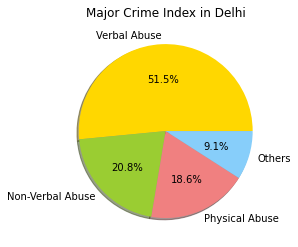

Verbal Abuse        3003
Physical Abuse      1215
Non-Verbal Abuse    1082
Others               529
Name: Category, dtype: int64


In [88]:
crime_primary_cat_delihi_data_count = delhi_crime_data['Category'].value_counts()
crime_primary_cat_delhi_data_type = delhi_crime_data['Category'].unique().tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(crime_primary_cat_delihi_data_count,labels=crime_primary_cat_delhi_data_type,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Major Crime Index in Delhi')
plt.show()
print(crime_primary_cat_delihi_data_count)

### Areas with the highest criminal records in Delhi

In [89]:
top_crime_areas_Delhi = delhi_crime_data['Area'].value_counts()
top_crime_areas_Delhi.head(10)

Dwarka                1036
Paharganj              606
Karol Bagh             545
Pitampura              406
Connaught Place        296
Uttam Nagar            292
Dakshinpuri            159
Okhla                  142
University Enclave      88
Lal Kuan                83
Name: Area, dtype: int64

DWarka is the most unsafe place in Delhi.

### Citywise criminal records in Delhi

In [90]:
top_criminal_cities_Delhi = delhi_crime_data['City'].value_counts()
top_criminal_cities_Delhi

Central Delhi       1633
South West Delhi    1482
South Delhi          889
North West Delhi     590
West Delhi           490
North Delhi          334
East Delhi           259
New Delhi             77
South East Delhi      67
North East Delhi       8
Name: City, dtype: int64

In [91]:
top_criminal_cities_Delhi = pd.DataFrame(top_criminal_cities_Delhi) 
top_criminal_cities_Delhi.reset_index(inplace=True)
top_criminal_cities_Delhi = top_criminal_cities_Delhi.rename(columns = {'index':'City','City':'Count'})
top_criminal_cities_Delhi

,City,Count
0,Central Delhi,1633
1,South West Delhi,1482
2,South Delhi,889
3,North West Delhi,590
4,West Delhi,490
5,North Delhi,334
6,East Delhi,259
7,New Delhi,77
8,South East Delhi,67
9,North East Delhi,8


Central Delhi is the most unsafe zone in Delhi.

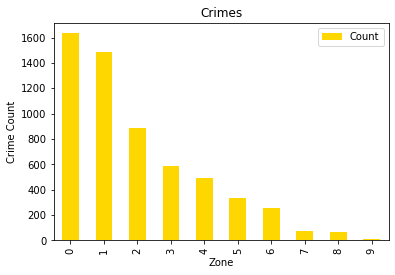

In [92]:
top_criminal_cities_Delhi.plot.bar(stacked=False, title='Crimes',color='gold') 
plt.xlabel("Zone")
plt.ylabel("Crime Count")
plt.show()

### Citywise Criminal record of each type

In [93]:
grp_data_city = delhi_crime_data.groupby(['City','Category']).size().reset_index()
grp_data_city = grp_data_city.rename(columns = {0: 'Count'}, inplace = False)
pivot = pd.pivot_table(data=grp_data_city,index='City',columns='Category',values='Count',fill_value=0)
pivot

Category,Non-Verbal Abuse,Others,Physical Abuse,Verbal Abuse
City,,,,
Central Delhi,226,231,346,830
East Delhi,33,19,76,131
New Delhi,11,2,13,51
North Delhi,48,33,63,190
North East Delhi,3,0,2,3
North West Delhi,96,45,113,336
South Delhi,194,37,164,494
South East Delhi,20,6,7,34
South West Delhi,371,145,259,707


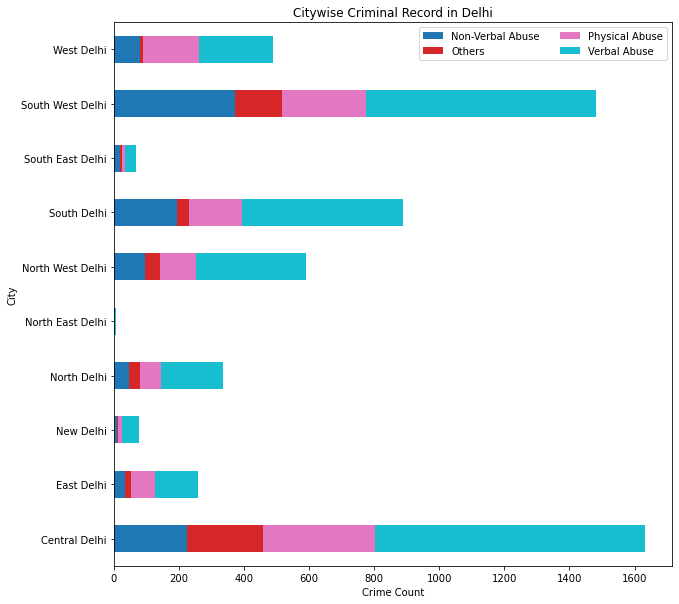

In [94]:
pivot.plot.barh(stacked=True, title='Citywise Criminal Record in Delhi',colormap='tab10',figsize=(10, 10)) 
plt.legend(loc="upper right", ncol=2)
plt.xlabel("Crime Count")
plt.ylabel("City")
plt.show()

### Different types of crime committed in Delhi

In [95]:
delhi_crime_data.groupby(['Incident Category']).size().reset_index().sort_values(by=0, ascending=False)

,Incident Category,0
2,Commenting,1419
0,Catcalls/Whistles,1215
16,Touching /Groping,816
7,Ogling/Lewd Facial Expressions/Staring,762
9,Others,415
1,Chain Snatching,227
14,Stalking,188
15,Taking pictures without permission,180
13,Sexual Invites,176
11,Poor / No Street Lighting,108


#### Cluster coding based on incident count of a place

In [96]:
delhi_crime_data.groupby(['Delhi Incidents Cluster']).size().reset_index()

,Delhi Incidents Cluster,0
0,High: >50 Incidents,4030
1,Low: < 20 Incidents,1015
2,Mid: 20-50 Incidents,784


There are 4030 highly unsafe localities in Delhi.

#### Cluster coding the crimes based on crime count

In [97]:
map_dict ={'High: >50 Incidents' : 'High', 'Mid: 20-50 Incidents' : 'Med', 'Low: < 20 Incidents' : 'Low'}
delhi_crime_data['Delhi_Cluster_code'] = data['Delhi Incidents Cluster'].map(map_dict)
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,year,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,2014,4,19,109,16,16,5,5,2,Med
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,2014,4,4,94,14,14,4,4,2,Med
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,2014,4,18,108,16,16,4,4,2,Med
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,2014,2,24,55,9,9,0,0,1,Low
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,2014,4,25,115,17,17,4,4,2,Med


### Comparative crime cases citywise in Delhi

In [98]:
citywise_index_data = delhi_crime_data.groupby(['City','Delhi_Cluster_code']).size().reset_index()
citywise_index_data = citywise_index_data.rename(columns = {0: 'Count'}, inplace = False)
citywise_index_data_pivot = pd.pivot_table(data=citywise_index_data,index='City',columns='Delhi_Cluster_code',values='Count',fill_value=0)
citywise_index_data_pivot

Delhi_Cluster_code,High,Low,Med
City,,,
Central Delhi,1444,108,81
East Delhi,0,90,169
New Delhi,3,34,40
North Delhi,219,115,0
North East Delhi,0,8,0
North West Delhi,406,95,89
South Delhi,453,203,233
South East Delhi,0,67,0
South West Delhi,1150,225,107


Central Delhi is the most unsafe zone in Delhi

### Comparative crime cases areawise in Delhi

In [99]:
areawise_index_data = delhi_crime_data.groupby(['Area','Delhi_Cluster_code']).size().reset_index()
areawise_index_data = areawise_index_data.rename(columns = {0: 'Count'}, inplace = False)
areawise_index_data_pivot = pd.pivot_table(data=areawise_index_data,index='Area',columns='Delhi_Cluster_code',values='Count',fill_value=0)
areawise_index_data_pivot

Delhi_Cluster_code,High,Low,Med
Area,,,
AIIMS,0,11,0
Adarsh Nagar,0,4,0
Adchini,0,1,0
Ajmeri Gate,0,14,0
Akbar Road,0,1,0
...,...,...,...
Wazirabad,0,4,0
Yamuna Bank,0,8,0
Yamuna Vihar,0,2,0


### Map showing crime locations in the past 18 years.(2002-2020)

#### Incident Location Specific

In [100]:
px.scatter_geo(delhi_crime_data,lat='Latitude',lon='Longitude',title='Delhi State Criminal Record',color='Delhi_Cluster_code')

#### Zone specific

In [101]:
fig = px.choropleth(
    delhi_crime_data,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=delhi_crime_data['City'],
    color=delhi_crime_data['Delhi_Cluster_code'],
    color_continuous_scale='Reds')
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [102]:
map_dict ={'High' : 0,'Med' : 1, 'Low' : 2}
delhi_crime_data['Delhi_Cluster_code_encode'] = delhi_crime_data['Delhi_Cluster_code'].map(map_dict)
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,month,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,4,19,109,16,16,5,5,2,Med,1
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,4,4,94,14,14,4,4,2,Med,1
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,4,18,108,16,16,4,4,2,Med,1
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,2,24,55,9,9,0,0,1,Low,2
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,4,25,115,17,17,4,4,2,Med,1


In [103]:
top_criminal_cities_Delhi

,City,Count
0,Central Delhi,1633
1,South West Delhi,1482
2,South Delhi,889
3,North West Delhi,590
4,West Delhi,490
5,North Delhi,334
6,East Delhi,259
7,New Delhi,77
8,South East Delhi,67
9,North East Delhi,8


### Crime timing in Delhi

In [104]:
delhi_crime_time = delhi_crime_data.groupby(['Day Quarter Group']).size().reset_index()
delhi_crime_time

,Day Quarter Group,0
0,Quarter 1 : 12 Midnight to 6 AM,2073
1,Quarter 2 : 6 AM to 12 Noon,986
2,Quarter 3 : 12 Noon to 6 PM,1238
3,Quarter 4 : 6 PM to 12 Midnight,1532


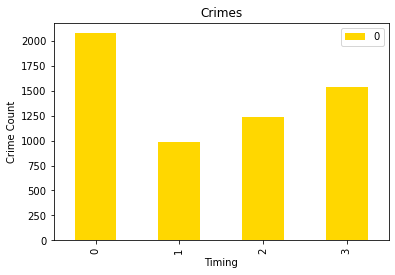

In [105]:
delhi_crime_time.plot.bar(stacked=False, title='Crimes',color='gold') 
plt.xlabel("Timing")
plt.ylabel("Crime Count")
plt.show()

Most of the crimes take place between 12 midnight and 6am

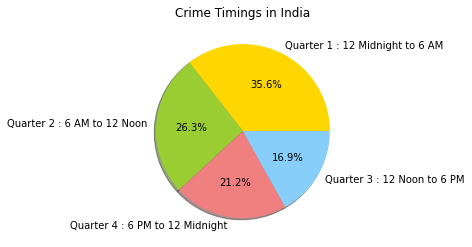

Quarter 1 : 12 Midnight to 6 AM    2073
Quarter 4 : 6 PM to 12 Midnight    1532
Quarter 3 : 12 Noon to 6 PM        1238
Quarter 2 : 6 AM to 12 Noon         986
Name: Day Quarter Group, dtype: int64


In [106]:
delhi_crime_time_data_count = delhi_crime_data['Day Quarter Group'].value_counts()
delhi_crime_time_data_type = delhi_crime_data['Day Quarter Group'].unique().tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(delhi_crime_time_data_count,labels=delhi_crime_time_data_type,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Crime Timings in India')
plt.show()
print(delhi_crime_time_data_count)

In [107]:
citywise_delhi_crimetime_data = delhi_crime_data.groupby(['City','Day Quarter Group']).size().reset_index()
citywise_delhi_crimetime_data = citywise_delhi_crimetime_data.rename(columns = {0: 'Count'}, inplace = False)
citywise_delhi_crimetime_data_pivot = pd.pivot_table(data=citywise_delhi_crimetime_data,index='City',columns='Day Quarter Group',values='Count',fill_value=0)
citywise_delhi_crimetime_data_pivot

Day Quarter Group,Quarter 1 : 12 Midnight to 6 AM,Quarter 2 : 6 AM to 12 Noon,Quarter 3 : 12 Noon to 6 PM,Quarter 4 : 6 PM to 12 Midnight
City,,,,
Central Delhi,572,141,351,569
East Delhi,94,43,50,72
New Delhi,33,19,16,9
North Delhi,129,59,55,91
North East Delhi,1,1,4,2
North West Delhi,268,72,92,158
South Delhi,308,153,246,182
South East Delhi,19,13,14,21
South West Delhi,495,394,299,294


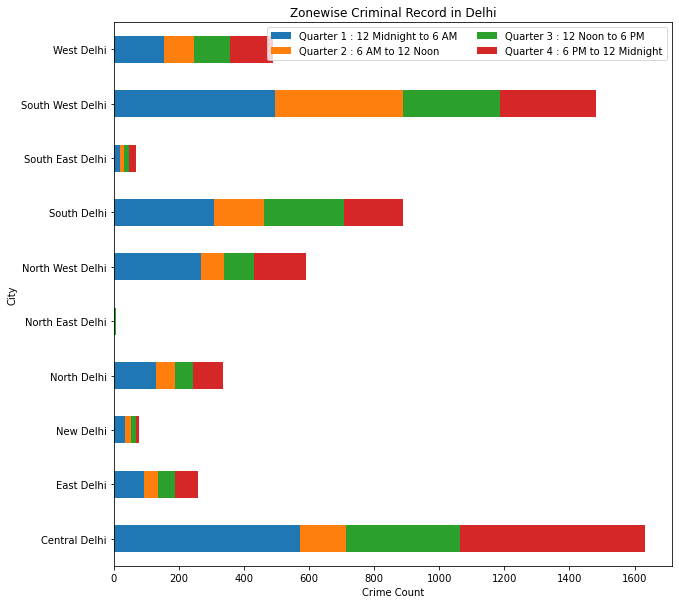

In [108]:
citywise_delhi_crimetime_data_pivot.plot.barh(stacked=True, title='Zonewise Criminal Record in Delhi',figsize=(10, 10)) 
plt.legend(loc="upper right", ncol=2)
plt.xlabel("Crime Count")
plt.ylabel("City")
plt.show()

In [109]:
areawise_delhi_crimetime_data = delhi_crime_data.groupby(['Area','Day Quarter Group']).size().reset_index()
areawise_delhi_crimetime_data = areawise_delhi_crimetime_data.rename(columns = {0: 'Count'}, inplace = False)
areawise_delhi_crimetime_data_pivot = pd.pivot_table(data=areawise_delhi_crimetime_data,index='Area',columns='Day Quarter Group',values='Count',fill_value=0)
areawise_delhi_crimetime_data_pivot

Day Quarter Group,Quarter 1 : 12 Midnight to 6 AM,Quarter 2 : 6 AM to 12 Noon,Quarter 3 : 12 Noon to 6 PM,Quarter 4 : 6 PM to 12 Midnight
Area,,,,
AIIMS,5,2,1,3
Adarsh Nagar,0,0,1,3
Adchini,1,0,0,0
Ajmeri Gate,9,2,0,3
Akbar Road,0,0,0,1
...,...,...,...,...
Wazirabad,1,2,0,1
Yamuna Bank,2,0,4,2
Yamuna Vihar,1,1,0,0


In [110]:
severity_delhi_crimetime_data = delhi_crime_data.groupby(['Delhi_Cluster_code','Day Quarter Group']).size().reset_index()
severity_delhi_crimetime_data = severity_delhi_crimetime_data.rename(columns = {0: 'Count'}, inplace = False)
severity_delhi_crimetime_data_pivot = pd.pivot_table(data=severity_delhi_crimetime_data,index='Delhi_Cluster_code',columns='Day Quarter Group',values='Count',fill_value=0)
severity_delhi_crimetime_data_pivot

Day Quarter Group,Quarter 1 : 12 Midnight to 6 AM,Quarter 2 : 6 AM to 12 Noon,Quarter 3 : 12 Noon to 6 PM,Quarter 4 : 6 PM to 12 Midnight
Delhi_Cluster_code,,,,
High,1440,691,847,1052
Low,359,168,206,282
Med,274,127,185,198


In [111]:
delhi_crime_data['Area'].nunique()

228

In [112]:
delhi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 8 to 11436
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Address                    5829 non-null   object        
 1   Area                       5829 non-null   object        
 2   City                       5829 non-null   object        
 3   Category                   5829 non-null   object        
 4   Day Quarter Group          5829 non-null   object        
 5   Day Time                   5829 non-null   object        
 6   Delhi Districts Cluster    5829 non-null   object        
 7   Delhi Incidents Cluster    5829 non-null   object        
 8   Id                         5829 non-null   int64         
 9   Incident Category          5829 non-null   object        
 10  Incident Date              5829 non-null   datetime64[ns]
 11  Incident Time              5829 non-null   object        
 12  Title

In [113]:
delhi_crime_data['Incident Time']

8        01:00:00
9        01:00:00
10       01:00:00
11       01:00:00
15       01:00:00
           ...   
11418    09:56:00
11419    21:56:00
11425    09:57:00
11435    09:59:00
11436    09:59:00
Name: Incident Time, Length: 5829, dtype: object

In [114]:
import datetime
delhi_crime_data['Incident Time'] = delhi_crime_data['Incident Time'].apply(lambda x: datetime.datetime.strptime(x,'%H:%M:%S'))

In [115]:
delhi_crime_data['time_hour']=delhi_crime_data['Incident Time'].apply(lambda x:x.hour)
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,19,109,16,16,5,5,2,Med,1,1
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,4,94,14,14,4,4,2,Med,1,1
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,18,108,16,16,4,4,2,Med,1,1
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,24,55,9,9,0,0,1,Low,2,1
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,25,115,17,17,4,4,2,Med,1,1


In [116]:
delhi_crime_data['time_hour'].nunique()

24

### Hourly Crime trend analysis in Delhi

In [117]:
crimes_by_time = delhi_crime_data.groupby('time_hour').size().reset_index(name='No. of Crimes')
crimes_by_time['time_hour'] = crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')
crimes_by_time

,time_hour,No. of Crimes
0,0:00,145
1,1:00,369
2,2:00,185
3,3:00,98
4,4:00,130
5,5:00,69
6,6:00,67
7,7:00,141
8,8:00,101
9,9:00,131


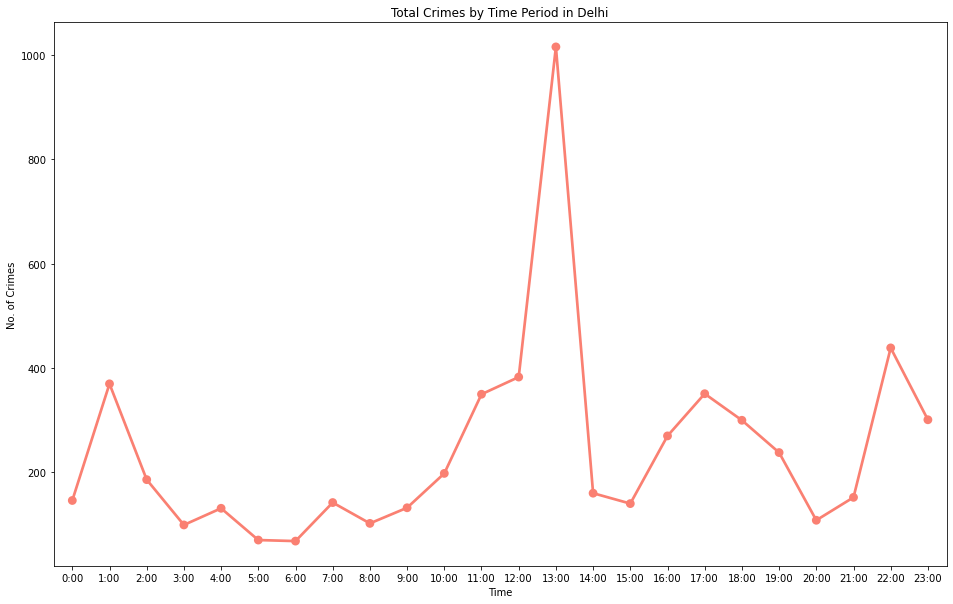

In [118]:
fig = plt.figure(figsize=(16, 10))
sns.pointplot(data=crimes_by_time, x="time_hour", y="No. of Crimes", color="salmon")
plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.title('Total Crimes by Time Period in Delhi')
plt.show()

### Crime by type and time of day

In [119]:
crimes_by_type = delhi_crime_data.groupby(['time_hour','Category']).size().reset_index(name='No. of Crimes')
crimes_by_type['time_hour'] = crimes_by_type['time_hour'].apply(lambda x: str(x)+':00')
crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['time_hour'], columns=['Category'], values='No. of Crimes', aggfunc=np.sum)
crimes_by_type_pivot

Category,Non-Verbal Abuse,Others,Physical Abuse,Verbal Abuse
time_hour,,,,
0:00,12,9,29,95
10:00,44,13,49,91
11:00,57,17,80,195
12:00,72,16,62,232
13:00,195,65,202,554
14:00,35,21,24,79
15:00,36,6,37,60
16:00,43,16,61,149
17:00,49,62,84,155


<AxesSubplot:title={'center':'No. of Crimes by Type'}, xlabel='time_hour'>

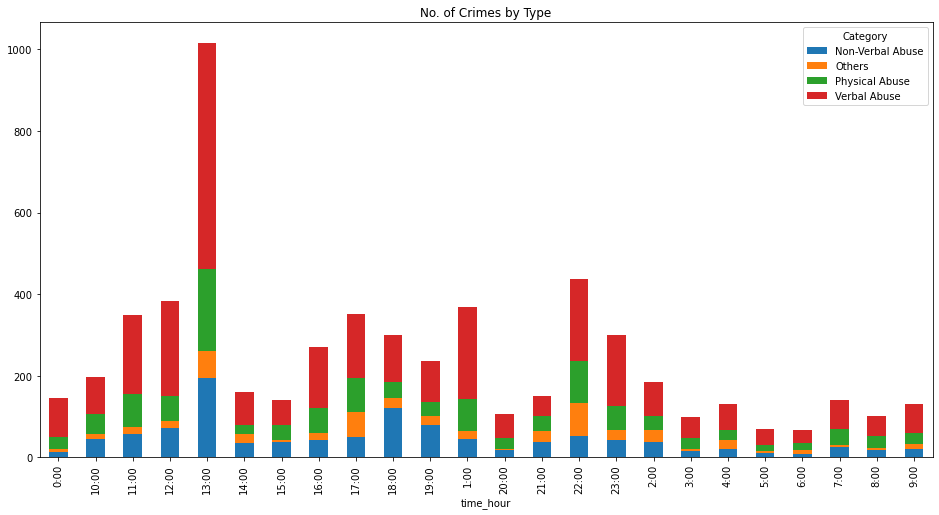

In [120]:
crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(16,8), title="No. of Crimes by Type")

### Monthly crime trend in Delhi

In [121]:
crimes_by_month = delhi_crime_data.groupby('month').size().reset_index(name='No. of Crimes')
crimes_by_month['month (average)'] = crimes_by_month['No. of Crimes'].apply(lambda x: x/18)
crimes_by_month

,month,No. of Crimes,month (average)
0,1,340,18.888889
1,2,1556,86.444444
2,3,341,18.944444
3,4,285,15.833333
4,5,570,31.666667
5,6,128,7.111111
6,7,151,8.388889
7,8,158,8.777778
8,9,1028,57.111111
9,10,601,33.388889


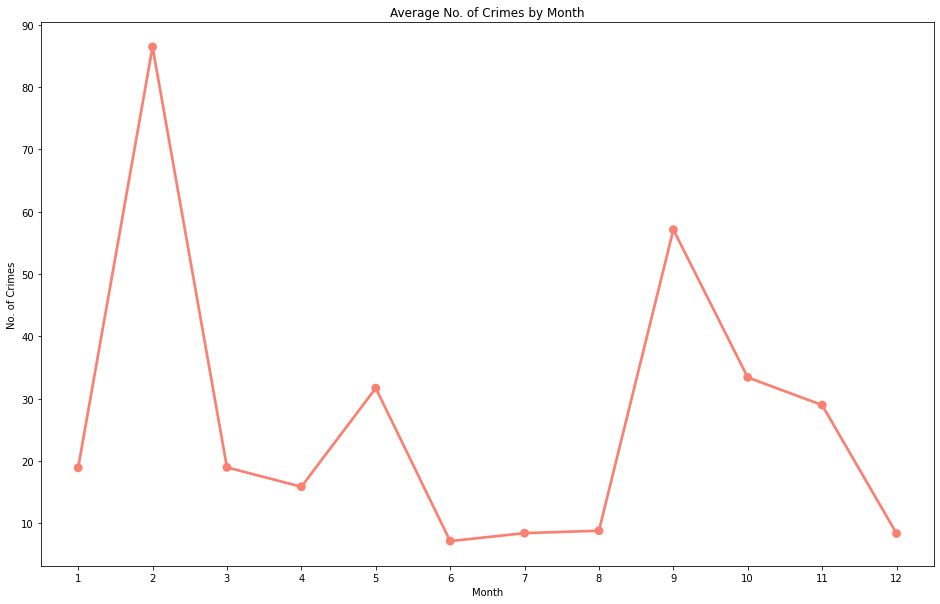

In [122]:
fig = plt.figure(figsize=(16, 10))
sns.pointplot(data=crimes_by_month, x='month', y='month (average)', color="salmon")
plt.xlabel('Month')
plt.ylabel('No. of Crimes')
plt.title('Average No. of Crimes by Month')
plt.show()

### Top 10 incidents by month

In [123]:
top_crimes = delhi_crime_data.groupby('Incident Category').size().reset_index(name='No. of Crimes')
top_crimes = pd.DataFrame(top_crimes).nlargest(10, 'No. of Crimes')
top_crimes = list(top_crimes['Incident Category'])
top_crimes

['Commenting',
 'Catcalls/Whistles',
 'Touching /Groping',
 'Ogling/Lewd Facial Expressions/Staring',
 'Others',
 'Chain Snatching',
 'Stalking',
 'Taking pictures without permission',
 'Sexual Invites',
 'Poor / No Street Lighting']

In [124]:
crime_df = delhi_crime_data.groupby(['Incident Category','month']).size().reset_index(name='Crime_count')
crime_df

,Incident Category,month,Crime_count
0,Catcalls/Whistles,1,87
1,Catcalls/Whistles,2,370
2,Catcalls/Whistles,3,36
3,Catcalls/Whistles,4,54
4,Catcalls/Whistles,5,71
...,...,...,...
165,Touching /Groping,8,21
166,Touching /Groping,9,173
167,Touching /Groping,10,55
168,Touching /Groping,11,61


In [125]:
crime_df = crime_df[crime_df['Incident Category'].isin (top_crimes)]
crime_df

,Incident Category,month,Crime_count
0,Catcalls/Whistles,1,87
1,Catcalls/Whistles,2,370
2,Catcalls/Whistles,3,36
3,Catcalls/Whistles,4,54
4,Catcalls/Whistles,5,71
...,...,...,...
165,Touching /Groping,8,21
166,Touching /Groping,9,173
167,Touching /Groping,10,55
168,Touching /Groping,11,61


In [126]:
crime_df_pivot = pd.pivot_table(crime_df,index=['Incident Category'], columns=['month'],values='Crime_count')
crime_df_pivot.fillna(0, inplace=True)
crime_df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
Incident Category,,,,,,,,,,,,
Catcalls/Whistles,87.0,370.0,36.0,54.0,71.0,19.0,25.0,31.0,227.0,165.0,103.0,27.0
Chain Snatching,19.0,57.0,10.0,13.0,10.0,5.0,2.0,3.0,27.0,45.0,27.0,9.0
Commenting,101.0,399.0,55.0,78.0,82.0,33.0,43.0,44.0,193.0,196.0,150.0,45.0
Ogling/Lewd Facial Expressions/Staring,22.0,292.0,74.0,32.0,98.0,14.0,18.0,18.0,61.0,35.0,81.0,17.0
Others,11.0,72.0,13.0,13.0,11.0,2.0,6.0,10.0,201.0,34.0,33.0,9.0
Poor / No Street Lighting,3.0,79.0,2.0,2.0,4.0,3.0,8.0,0.0,4.0,1.0,2.0,0.0
Sexual Invites,6.0,24.0,13.0,5.0,21.0,2.0,7.0,7.0,49.0,21.0,17.0,4.0
Stalking,21.0,4.0,13.0,6.0,83.0,11.0,2.0,13.0,6.0,11.0,14.0,4.0
Taking pictures without permission,8.0,36.0,15.0,16.0,17.0,12.0,4.0,5.0,20.0,18.0,24.0,5.0


<AxesSubplot:title={'center':'Major crimes (January - December)'}, xlabel='month', ylabel='Incident Category'>

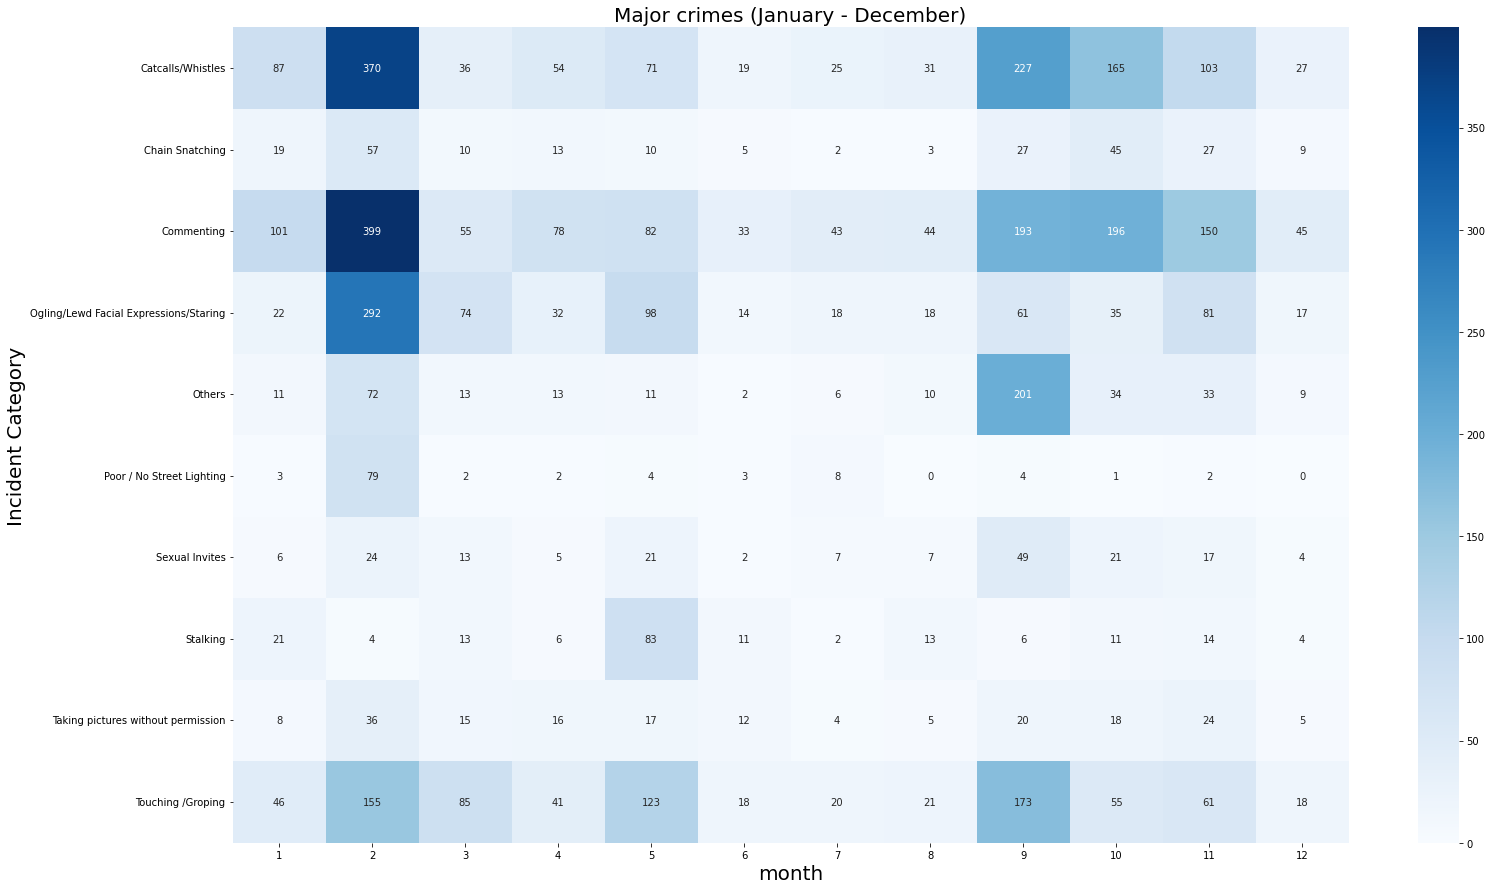

In [127]:
DIMS=(25, 15)
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
ax1.set_title('Major crimes (January - December)', fontsize=20)
ax1.set_ylabel ('Incident Category', fontsize=20)
ax1.set_xlabel('month', fontsize=20)
sns.heatmap (crime_df_pivot, cmap="Blues", annot=True, fmt='g')

# Feature Engineering

### We have primarily created two new features namely severity index and safety index.

In [128]:
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,day,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,19,109,16,16,5,5,2,Med,1,1
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,4,94,14,14,4,4,2,Med,1,1
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,18,108,16,16,4,4,2,Med,1,1
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,24,55,9,9,0,0,1,Low,2,1
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,25,115,17,17,4,4,2,Med,1,1


In [129]:
crime_mapping = {'Others':1, 
                   'Poor / No Street Lighting':2, 
                   'Stalking':3, 
                   'Ogling/Lewd Facial Expressions/Staring':4,
                   'Taking pictures without permission':5,
                   'Catcalls/Whistles':6,
                   'Commenting':7,
                   'Petty Robbery':8,
                   'North East India Report':9,
                   'Online Harassment':10,
                   'Indecent exposure':11,
                   'Indecent Exposure/Masturbation in public':12,
                   'Chain Snatching':13,
                   'Sexual Invites':14,
                   'Touching /Groping':15,
                   'Human Trafficking':16,
                   'Rape / Sexual Assault':17
                  }
delhi_crime_data['crime_code'] = delhi_crime_data['Incident Category'].map(crime_mapping)

In [130]:
delhi_crime_data['crime_code'].nunique()

17

In [131]:
# creating feature 'severity_index' for crime type 1 = Infractions, 2 = Misdemeanors, 3 = Felony
infractions = [1,2]
misdemeanors = [3,4,5,6,7,8,9,10,11,12]
felony = [13,14,15,16,17]
delhi_crime_data['Severity_index']= delhi_crime_data['crime_code'].apply(lambda x: 'Low' if x in infractions else 'Med' if x in misdemeanors else 'High')

In [132]:
delhi_crime_data.head(5)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour,crime_code,Severity_index
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,16,16,5,5,2,Med,1,1,6,Med
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,14,14,4,4,2,Med,1,1,4,Med
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,16,16,4,4,2,Med,1,1,15,High
11,"Ber Sarai, New Delhi, Delhi, India",Ber Sarai,South West Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Low: < 20 Incidents,3640,Catcalls/Whistles,...,9,9,0,0,1,Low,2,1,6,Med
15,"Rajpath Road Area, Central Secretariat, New De...",Central Secretariat,Central Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,High: >500 Incidents,Mid: 20-50 Incidents,4329,Touching /Groping,...,17,17,4,4,2,Med,1,1,15,High


### Safety index derivation

In [133]:
grp_data_area = delhi_crime_data.groupby(['Area','Severity_index']).size().reset_index()
grp_data_area = grp_data_area.rename(columns = {0: 'Count'}, inplace = False)
pivot = pd.pivot_table(data=grp_data_area,index='Area',columns='Severity_index',values='Count',fill_value=0)
pivot

Severity_index,High,Low,Med
Area,,,
AIIMS,3,0,8
Adarsh Nagar,1,0,3
Adchini,1,0,0
Ajmeri Gate,2,2,10
Akbar Road,0,0,1
...,...,...,...
Wazirabad,3,0,1
Yamuna Bank,3,0,5
Yamuna Vihar,2,0,0


In [134]:
pivot['Safety_index'] = pivot['High']*1 + pivot['Med']*0.5 + pivot['Low']*0.1

In [135]:
pivot

Severity_index,High,Low,Med,Safety_index
Area,,,,
AIIMS,3,0,8,7.0
Adarsh Nagar,1,0,3,2.5
Adchini,1,0,0,1.0
Ajmeri Gate,2,2,10,7.2
Akbar Road,0,0,1,0.5
...,...,...,...,...
Wazirabad,3,0,1,3.5
Yamuna Bank,3,0,5,5.5
Yamuna Vihar,2,0,0,2.0


In [136]:
pivot['Safety_index'].min()

0.1

In [137]:
pivot['Safety_index'].max()

546.0

In [138]:
pivot.loc[pivot['Safety_index'].idxmax()]

Severity_index
High            152.0
Low             120.0
Med             764.0
Safety_index    546.0
Name: Dwarka, dtype: float64

In [139]:
pivot['Safety_index']= pivot['Safety_index'].apply(lambda x: (x-pivot['Safety_index'].min())/(pivot['Safety_index'].max()-pivot['Safety_index'].min()))

In [140]:
pivot

Severity_index,High,Low,Med,Safety_index
Area,,,,
AIIMS,3,0,8,0.012640
Adarsh Nagar,1,0,3,0.004396
Adchini,1,0,0,0.001649
Ajmeri Gate,2,2,10,0.013006
Akbar Road,0,0,1,0.000733
...,...,...,...,...
Wazirabad,3,0,1,0.006228
Yamuna Bank,3,0,5,0.009892
Yamuna Vihar,2,0,0,0.003480


In [141]:
pivot.loc[pivot['Safety_index'].idxmax()]

Severity_index
High            152.0
Low             120.0
Med             764.0
Safety_index      1.0
Name: Dwarka, dtype: float64

In [142]:
pivot.reset_index(inplace=True)
pivot = pivot.rename(columns = {'index':'Area'})

In [143]:
pivot

Severity_index,Area,High,Low,Med,Safety_index
0,AIIMS,3,0,8,0.012640
1,Adarsh Nagar,1,0,3,0.004396
2,Adchini,1,0,0,0.001649
3,Ajmeri Gate,2,2,10,0.013006
4,Akbar Road,0,0,1,0.000733
...,...,...,...,...,...
223,Wazirabad,3,0,1,0.006228
224,Yamuna Bank,3,0,5,0.009892
225,Yamuna Vihar,2,0,0,0.003480
226,Yusuf Sarai,0,0,1,0.000733


In [144]:
safety_index_data = pivot[['Area','Safety_index']]
safety_index_data

Severity_index,Area,Safety_index
0,AIIMS,0.012640
1,Adarsh Nagar,0.004396
2,Adchini,0.001649
3,Ajmeri Gate,0.013006
4,Akbar Road,0.000733
...,...,...
223,Wazirabad,0.006228
224,Yamuna Bank,0.009892
225,Yamuna Vihar,0.003480
226,Yusuf Sarai,0.000733


In [145]:
safety_index_data.to_excel('Safety_index.xls',index=False)

In [146]:
safety_index_data.nunique()

Severity_index
Area            228
Safety_index     90
dtype: int64

In [147]:
delhi_crime_data.head(3)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,week,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour,crime_code,Severity_index
8,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,16,16,5,5,2,Med,1,1,6,Med
9,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,14,14,4,4,2,Med,1,1,4,Med
10,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Physical Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,4000,Touching /Groping,...,16,16,4,4,2,Med,1,1,15,High


In [148]:
delhi_crime_data = pd.merge(delhi_crime_data, safety_index_data, on=['Area'])

In [149]:
delhi_crime_data.head(2)

,Address,Area,City,Category,Day Quarter Group,Day Time,Delhi Districts Cluster,Delhi Incidents Cluster,Id,Incident Category,...,weekofyear,dayofweek,weekday,quarter,Delhi_Cluster_code,Delhi_Cluster_code_encode,time_hour,crime_code,Severity_index,Safety_index
0,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3887,Catcalls/Whistles,...,16,5,5,2,Med,1,1,6,Med,0.038469
1,"Minto Bridge Colony, Barakhamba, New Delhi, De...",Barakhamba,New Delhi,Non-Verbal Abuse,Quarter 1 : 12 Midnight to 6 AM,1 AM-2 AM,Low: <100 Incidents,Mid: 20-50 Incidents,3996,Ogling/Lewd Facial Expressions/Staring,...,14,4,4,2,Med,1,1,4,Med,0.038469


In [150]:
delhi_crime_data['Safety_index_code']= delhi_crime_data['Safety_index'].apply(lambda x: 'Green' if x<0.01 else 'Red' if x>0.1 else 'Yellow')

In [151]:
delhi_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 0 to 5828
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Address                    5829 non-null   object        
 1   Area                       5829 non-null   object        
 2   City                       5829 non-null   object        
 3   Category                   5829 non-null   object        
 4   Day Quarter Group          5829 non-null   object        
 5   Day Time                   5829 non-null   object        
 6   Delhi Districts Cluster    5829 non-null   object        
 7   Delhi Incidents Cluster    5829 non-null   object        
 8   Id                         5829 non-null   int64         
 9   Incident Category          5829 non-null   object        
 10  Incident Date              5829 non-null   datetime64[ns]
 11  Incident Time              5829 non-null   datetime64[ns]
 12  Title 

In [152]:
delhi_crime_data['Safety_index_code_val']= delhi_crime_data['Safety_index_code'].apply(lambda x: '2' if x=='Green' else 1 if x=='Yellow' else 0)

In [154]:
delhi_crime_data.to_excel('Delhi_crime_data.xls',index=False)

In [155]:
delhi_crime_data['Safety_index_code'].value_counts()

Red       3565
Yellow    1759
Green      505
Name: Safety_index_code, dtype: int64

# ****